In [1]:
# get data

import os

def move_to_parent_dir():
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    os.chdir(parent_directory)
    print("Working directory:", os.getcwd())

move_to_parent_dir() 

Working directory: c:\Users\wwden\OneDrive\Documents\GitHub\dsmp-2024-group-19


In [10]:
from tools import get_Tapes
tapes = get_Tapes(125,0)
tapes = [t["Price"].resample("1min").last().ffill() for t in tapes]
train_tapes = tapes[0:2]
test_tapes = tapes[2:100]

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [11]:
import numpy as np
from numba import njit
# creating Input Data from varing linear regression sizes
#@njit
def linearMemoryDiff(seenData, seenDates, memory=0):
    '''
    function to fit a linear regression to 
    memory number of datapoints back
    then take the difference of the 
    predicted vs actual value
    '''
    if memory == 0:
        return 0
    else:
        seenData = seenData[-memory:]
        seenDates = seenDates[-memory:]
    
    x = np.arange(0, len(seenData))
    y = seenData
    
    # Add bias term to X
    X_b = np.column_stack((np.ones(len(x)), x))
    
    # Calculate the best-fit parameters using the normal equation
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    # Calculate the predicted value
    predictedValue = theta_best[0] + theta_best[1] * x[-1]

    return seenData[-1] / predictedValue - 1


def preprocess(data: np.array, int_dates: np.array):

    memory_lengths = [10,20,30,40,50,75,100,150,200,len(data)] # most popular moving average 
    
    input_matrix = np.zeros((len(data),len(memory_lengths)))
    print(input_matrix.shape)
    
    for i in range(len(data)-1):
        i = i + 1
        seenData = data[:i]
        seenDates = int_dates[:i]
        for j in range(len(memory_lengths)):
            if i == 1:
                pass
            else:
                input_matrix[i][j] = linearMemoryDiff(seenData,seenDates,memory_lengths[j])

    input_matrix = (input_matrix - input_matrix.min()) / (input_matrix.max() - input_matrix.min())

    return input_matrix

train_data = []
test_data = []

for arr in train_tapes:
    data = arr.values
    int_dates = np.arange(0,len(arr))
    input_matrix = preprocess(data, int_dates)
    train_data.append((data, int_dates, input_matrix))

for arr in test_tapes:
    data = arr.values
    int_dates = np.arange(0,len(arr))
    input_matrix = preprocess(data, int_dates)
    test_data.append((data, int_dates, input_matrix))

(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)
(510, 10)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

class broker:
    def __init__(self,data,dates,tradingBot,interest_rate=0):
        self.cash = 1 
        self.indexSum = 0 # starts with all money in index
        self.dateIndex = 0 
        self.dates = dates
        self.data = data / data[-1] # index is normalised to 1.0 start
        self.maxDate = len(data)
        self.tradingBot = tradingBot
        self.interest_rate = interest_rate
        self.daily_interest_rate = interest_rate / (365 * 24 * 60 * 60) # secondly

        self.totalValue = np.zeros(len(data))
        self.indexValue = np.zeros(len(data))
        self.cashValue = np.zeros(len(data))
        
        
        if len(data) != len(dates):
            print('Error: data length does not match date length')
            
    def buy(self,value: float):
        if value > self.cash:
            value = self.cash
            #print('Warning Buy Cash greater than amount held. DateIndex/Date=',self.dateIndex,self.dates[self.dateIndex])
        
        self.cash = self.cash - value
        self.indexSum = self.indexSum + value/self.data[self.dateIndex]
        
        
    def sell(self,value: float):
        if value > self.indexSum:
            value = self.indexSum
            #print('Warning Sell Value greater than amount held. DateIndex/Date=',self.dateIndex,self.dates[self.dateIndex])
        
        self.indexSum = self.indexSum - value
        self.cash = self.cash + value*self.data[self.dateIndex]
            
    def makeMove(self):
        # assuming we make the trade after close
        # we will have seen the close price.
        # we will be testing is the close price is over/under valued
        # we thus need to add +1 to the index due to python indexing. 
        # e.g day 1 (index=0) needs just todays price which is
        # data[:index+1] = int 
        seenData = self.data[:self.dateIndex+1] #if dateIndex is 0 it is first day
        seenDates = self.dates[:self.dateIndex+1]

        # function here input: seen data 
        # returns a number between 0 and 1
        # 1 being all portfolio in cash
        # 0 being all portfolio in stock
        action = self.tradingBot(seenData,seenDates) # add function here
        
        if action == -1: #pass
            pass
        else:
            currentValue = self.cash + self.indexSum * self.data[self.dateIndex] # current value of portfolio
            wantedValue = action * currentValue # wanted value in cash

            if self.cash > wantedValue: #if we have more cash than wanted
                #buy
                cashValue = self.cash-wantedValue
                self.buy(cashValue)

            elif self.cash < wantedValue: #if we have less cash than wanted
                #sell
                cashValue = wantedValue - self.cash
                indexValue = cashValue/self.data[self.dateIndex]
                self.sell(indexValue)

        self.indexValue[self.dateIndex] = self.indexSum
        self.cashValue[self.dateIndex] = self.cash #+ self.cash * self.daily_interest_rate # add interest
        self.totalValue[self.dateIndex] = self.cash + self.indexSum * self.data[self.dateIndex]
        self.dateIndex += 1 # after move is made, move to next date
        
    def run(self):
        while self.dateIndex < self.maxDate:
            self.makeMove()
            
    def plot(self,dataName: str):
        ax = plt.gca()
        plotDF = pd.DataFrame()
        plotDF['Dates'] = self.dates
        plotDF['Index'] = self.data
        plotDF['Trader'] = self.totalValue
        
        plotDF.plot(x='Dates',y='Trader',ax=ax)
        plotDF.plot(x='Dates',y='Index',ax=ax,label=dataName)
        plt.xticks(rotation=90)
        '''
        plt.plot(self.dates,self.data,label = dataName)
        plt.plot(self.dates,self.totalValue,label = 'Trader')
        
        plt.title(dataName+' vs Trader Performance')
        plt.legend()
        '''

    def lossFunc(net):
        pass


def batch_train_loss_func(net):
    batch_size = 16
    loss = 0
    sample = np.random.choice(list(range(len(train_data))), size=batch_size)
    for i in sample:
        data, int_dates, input_matrix = train_data[i]
        bot = lambda seenData,seenDates: net.forward([input_matrix[len(seenData)-1]])[0][0]
        env = broker(data,int_dates,bot)
        env.dateIndex = 5
        env.run()
        loss += 1/env.totalValue[-1]
    return loss / batch_size

def train_loss_func(net):
    loss = 0
    for i in train_data:
        data, int_dates, input_matrix = i
        bot = lambda seenData,seenDates: net.forward([input_matrix[len(seenData)-1]])[0][0]
        env = broker(data,int_dates,bot)
        env.dateIndex = 5
        env.run()
        loss += 1/env.totalValue[-1]
    return loss / len(train_data)

In [6]:
from learntools import Network, Learning

net1 = Network.network(10,1)
net1.add_layer(Network.relu())
net1.add_layer(Network.layer_dense(10,32))
net1.add_layer(Network.relu())
net1.add_layer(Network.layer_dense(32,8))
net1.add_layer(Network.relu())
net1.add_layer(Network.layer_dense(8,1))
net1.add_layer(Network.sigmoid())
net1.random_initilisation()

loss,_ = Learning.random_learning(net1,train_loss_func,info=True, max_its=1000, max_mutations=1000)

Iter 0 Loss 0.9666017379713434
Iter 1 Loss 0.9654083251653587
Iter 2 Loss 0.9641865078419151
Iter 3 Loss 0.9633153215431047
Iter 4 Loss 0.9617341146948344
Iter 5 Loss 0.9608711467864477
Iter 6 Loss 0.959708203767954
Iter 7 Loss 0.9552015220064556
Iter 8 Loss 0.9521327633397996
Iter 9 Loss 0.9490403424798899
Iter 10 Loss 0.9482393680331201
Iter 11 Loss 0.9474407899588901
Iter 12 Loss 0.9454704130357626
Iter 13 Loss 0.9439526152760811
Iter 14 Loss 0.9435815562076175
Iter 15 Loss 0.9418855812645885
Iter 16 Loss 0.9373977035860672
Iter 17 Loss 0.9370906081637592
Iter 18 Loss 0.9369405402424321
Iter 19 Loss 0.9364806602974167
Iter 20 Loss 0.9346279321742786
Iter 21 Loss 0.934051496011004
Iter 22 Loss 0.9322339815760906
Iter 23 Loss 0.9316878994293303
Iter 24 Loss 0.9313423336690548
Iter 25 Loss 0.9313151682532261
Iter 26 Loss 0.9301818047672227
Iter 27 Loss 0.9295718690940866
Iter 28 Loss 0.927509900660461
Iter 29 Loss 0.9242155978345729
Iter 30 Loss 0.9219800825628037
Iter 31 Loss 0.921311

0.4573888538760297


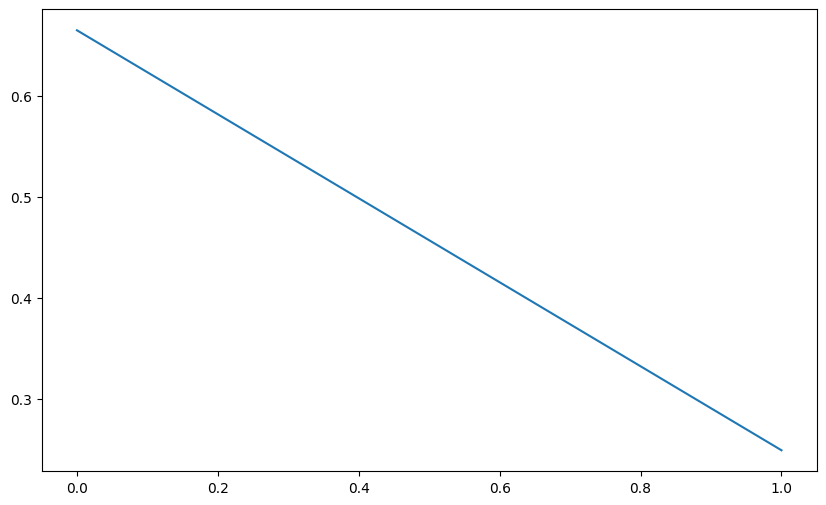

In [7]:
total_profit = []
for day in train_data:
    display_d, display_i, display_m = day

    bot = lambda seenData, seenDates: 1 if net1.forward([display_m[len(seenData)-1]])[0][0] > 0.5 else 0
    env = broker(display_d,display_i,bot)
    env.dateIndex = 5
    env.run()
    total_profit.append(env.totalValue[-1]-1)

plt.figure(figsize=(10,6))
plt.plot(total_profit)
print(np.mean(total_profit))

Profit 0.08295024624720782


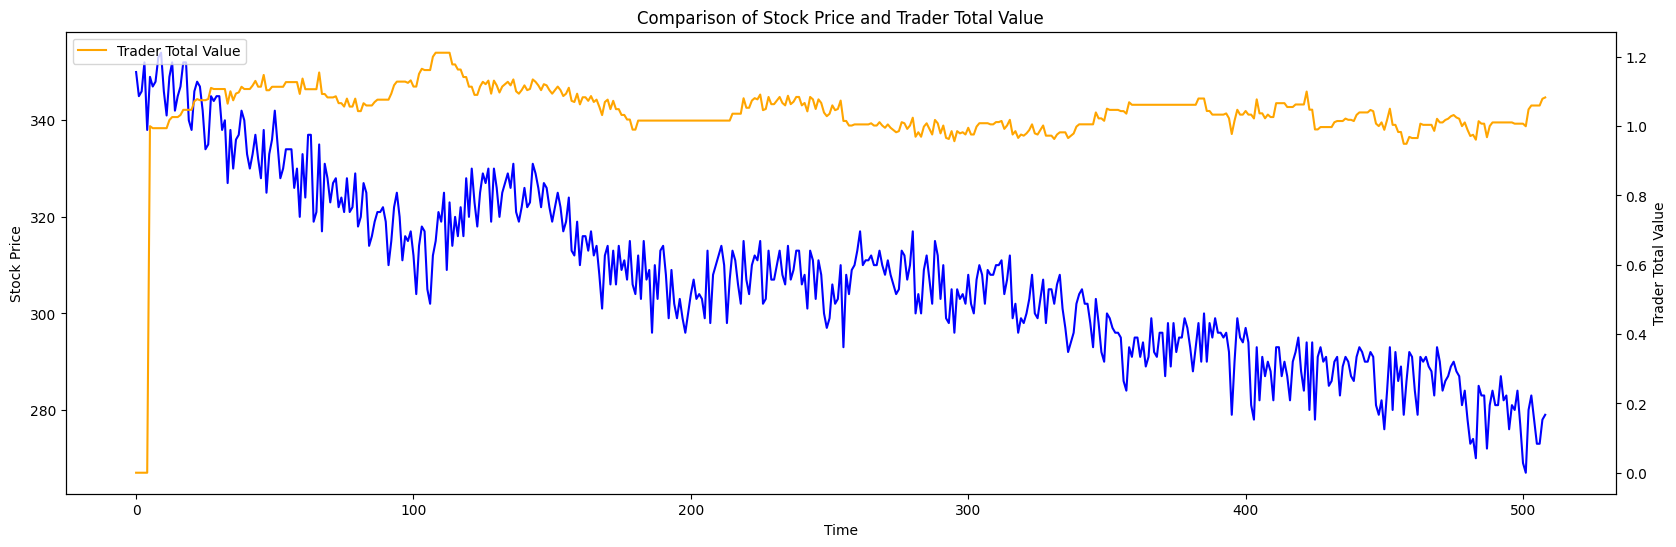

In [31]:
display_d, display_i, display_m = test_data[22]

bot = lambda seenData, seenDates: 1 if net1.forward([display_m[len(seenData)-1]])[0][0] > 0.5 else 0
env = broker(display_d,display_i,bot)
env.dateIndex = 5
env.run()
print("Profit", env.totalValue[-1] - 1)
start = 0
i = -1

plt.figure(figsize=(20, 6))

plt.plot(display_d[start:i], label='Stock Price', color='blue')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Comparison of Stock Price and Trader Total Value')

plt.twinx()
plt.plot(env.totalValue[start:i], label='Trader Total Value', color='orange')
plt.ylabel('Trader Total Value')

plt.legend(loc='upper left')
plt.show()

In [ ]:
show_weights = np.zeros((1, 11))  # add extra row for "impact"
show_weights[0][:10] = net1.layers[0].weights.reshape((10))
show_weights[0][-1] = net1.layers[0].biases[0]

plt.figure(figsize=(10, 6))
plt.matshow(show_weights, cmap='PRGn', vmin=-np.max(np.abs(show_weights)), vmax=np.max(np.abs(show_weights)))
plt.yticks([0], ['net1'])  # Show only weights for net1
plt.xticks(list(range(11)), [10, 20, 30, 40, 50, 75, 100, 150, 200, len(data)] + ['bias'])
plt.title("Weights in net1")
plt.colorbar()

for (i, j), z in np.ndenumerate(show_weights):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()


In [ ]:
tapes_test = get_Tapes(100,100)[0]
tapes_test

In [ ]:
resample_df_test = tapes_test["Price"].resample("1min").last().ffill()
data_test = resample_df_test.values
int_dates_test = np.arange(0,len(resample_df_test))

input_matrix_test = preprocess(data_test, int_dates_test)

In [ ]:
bot_test = lambda seenData, seenDates: 1 if net1.forward([input_matrix_test[len(seenData)-1]])[0][0] > 0.5 else 0
env = broker(data_test,int_dates_test,bot_test)
env.dateIndex = 5
env.run()
env.plot("Test")
env.totalValue

In [ ]:
start = 0
i = -1

plt.figure(figsize=(20, 6))

plt.plot(data_test[start:i], label='Stock Price', color='blue')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Comparison of Stock Price and Trader Total Value')

plt.twinx()
plt.plot(env.totalValue[start:i], label='Trader Total Value', color='orange')
plt.ylabel('Trader Total Value')
plt.ylim(0)

plt.legend(loc='upper left')
plt.show()